In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import tables

In [3]:
import sys
sys.path.append('../Debug_NN')

In [4]:
import plotann
import importlib
importlib.reload(plotann)

<module 'plotann' from '../Debug_NN/plotann.py'>

In [5]:
import tables_logger
import importlib
importlib.reload(tables_logger)

<module 'tables_logger' from '../Debug_NN/tables_logger.py'>

# Load Conv

In [6]:
filename = 'outarray.h5'

In [35]:
tables_logger.print_log(filename)

conv_1
  conv_1     W                    (60000, 8, 8, 4, 16)                 983.04 MB
  conv_1     b                    (60000, 16)                            3.84 MB
  conv_1     dW                   (60000, 8, 8, 4, 16)                 983.04 MB
  conv_1     db                   (60000, 16)                            3.84 MB
  conv_1     z                    (60000, 5, 20, 20, 16)              7680.00 MB
conv_2
  conv_2     W                    (60000, 4, 4, 16, 32)               1966.08 MB
  conv_2     b                    (60000, 32)                            7.68 MB
  conv_2     dW                   (60000, 4, 4, 16, 32)               1966.08 MB
  conv_2     db                   (60000, 32)                            7.68 MB
  conv_2     z                    (60000, 5, 9, 9, 32)                3110.40 MB
dense
  dense      W                    (60000, 100, 50)                    1200.00 MB
  dense      b                    (60000, 256)                          61.44 MB
  dense 

In [7]:
with tables.open_file(filename, mode='r') as f:
    
    tr_loss = np.array(f.root.metrics.loss)
    
    ##tr_x_raw = np.array(f.root.inout.batch_x)
    #ni, _, _, _, nn = tr_x_raw.shape
    #tr_x = tr_x_raw.reshape([ni, -1, nn])
    
    #tr_conv_1 = tables_logger.extract_layer_and_flatten(f.root.conv_1)
    tr_conv_2 = tables_logger.extract_layer_and_flatten(f.root.conv_2)
    
    #tr_dense = tables_logger.extract_layer_and_flatten(f.root.dense)
    
    #tr_output = tables_logger.extract_layer_and_flatten(f.root.output)
    #tr_y = np.array(f.root.inout.batch_y)

In [44]:
del tr_dense

In [ ]:
print('tr_conv_1_W_raw', tr_conv_1['W_raw'].shape)
print('tr_conv_1_b', tr_conv_1['b'].shape)
print('tr_conv_1_dW_raw', tr_conv_1['dW_raw'].shape)
print('tr_conv_1_db', tr_conv_1['db'].shape)
print('tr_conv_1_z_raw', tr_conv_1['z_raw'].shape)
print('tr_conv_1_W', tr_conv_1['W'].shape)
print('tr_conv_1_dW', tr_conv_1['dW'].shape)
print('tr_conv_1_z', tr_conv_1['z'].shape)

In [19]:
print('tr_output', tr_output['z'].shape)

tr_output (50000, 5, 6)


# Loss

In [8]:
def running_mean(x, n):
    return np.array([ np.mean(x[max(i-n+1, 0): i+1]) for i in range(len(x))])

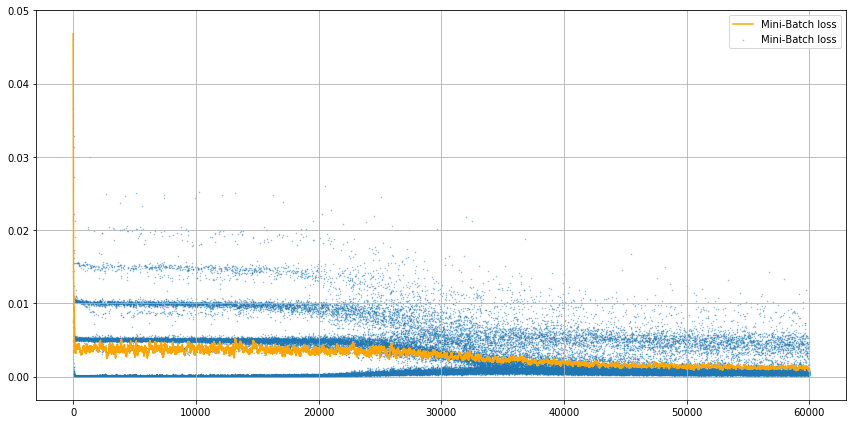

In [43]:
#
#   Plot Loss, Accuracy
#
fig, ax = plt.subplots(figsize=[12,6])
ax.scatter(range(len(tr_loss)), tr_loss, label='Mini-Batch loss', alpha=.5, marker='.', s=1)
ax.plot(running_mean(tr_loss, 100), label='Mini-Batch loss', alpha=1, color='orange')

#ax.set_xlim([100, 250])
#ax.set_ylim([0, .1])
ax.legend()
ax.grid()

fig.tight_layout()

# Inputs

In [85]:
tr_x_raw.shape

NameError: name 'tr_x_raw' is not defined

In [54]:
tr_x.shape

NameError: name 'tr_x' is not defined

In [73]:
es = 50 * 35280

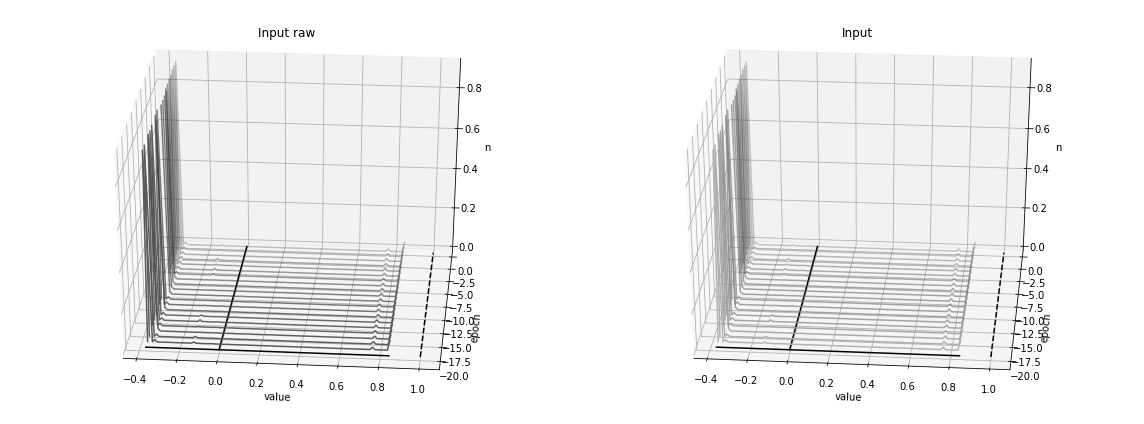

In [74]:
plotann.show_layer_activations(tr_x, epoch_size=es, activation_function=None,
                               title_prefix='Input', color=(.7,.7,.7,1), figsize=[16,6])

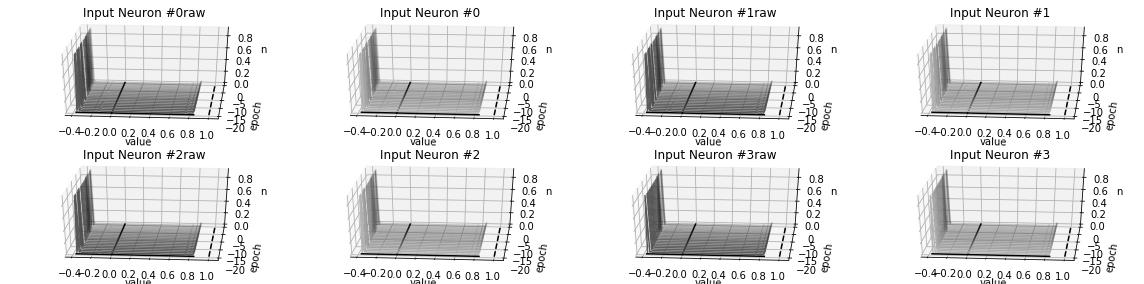

In [75]:
plotann.show_neurons_activations(tr_x, epoch_size=es, activation_function=None, neurons=range(tr_x.shape[-1]),
                                 title_prefix='Input', color=(.7,.7,.7,1))

# Conv 1

In [12]:
tr_conv_1['W'].shape

(20000, 256, 16)

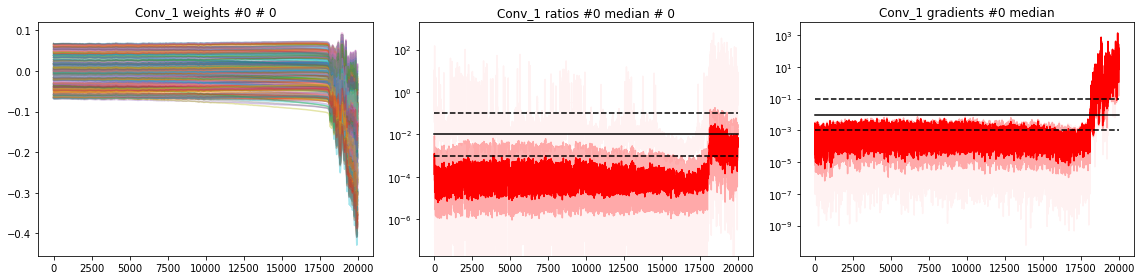

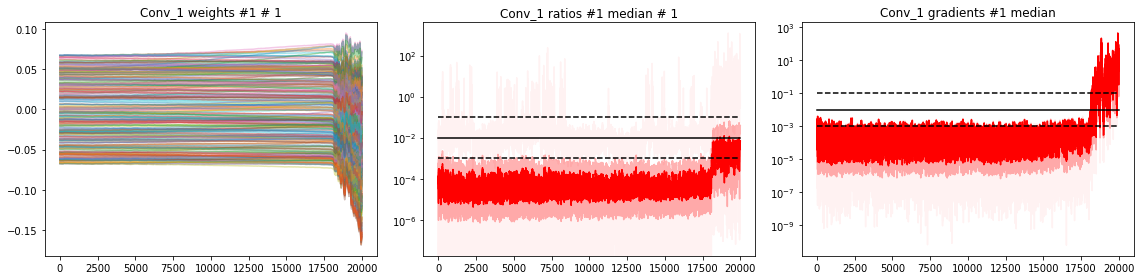

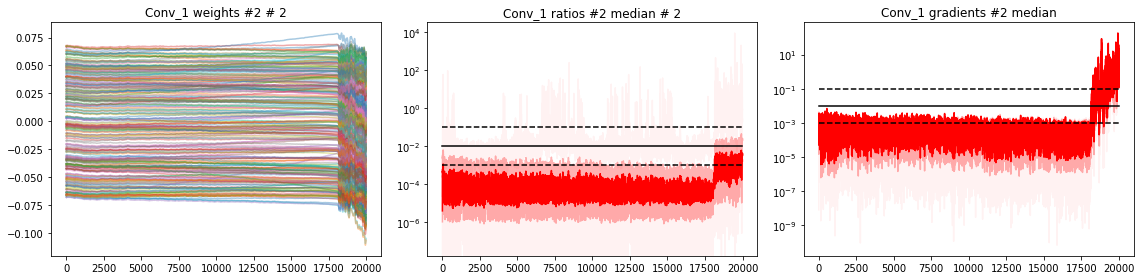

In [13]:
plotann.show_neurons_weights(tr_conv_1['W'], tr_conv_1['dW'], neurons=range(3),
                            title_prefix='Conv_1', color='red', figsize=[16,4])

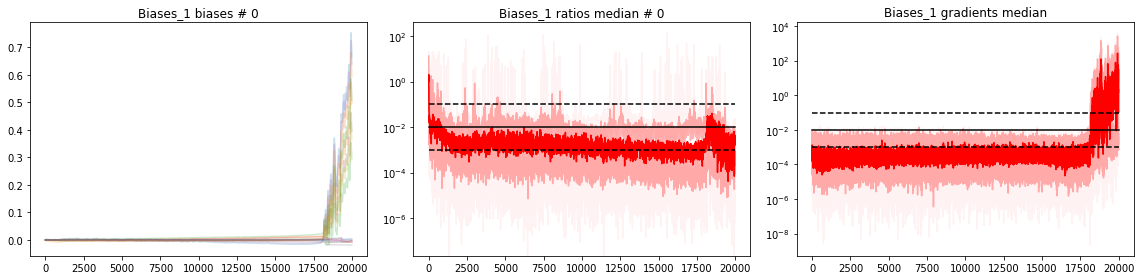

In [14]:
plotann.show_biases(tr_conv_1['b']+1e-6, tr_conv_1['db'], title_prefix='Biases_1', color='red', figsize=[16,4])

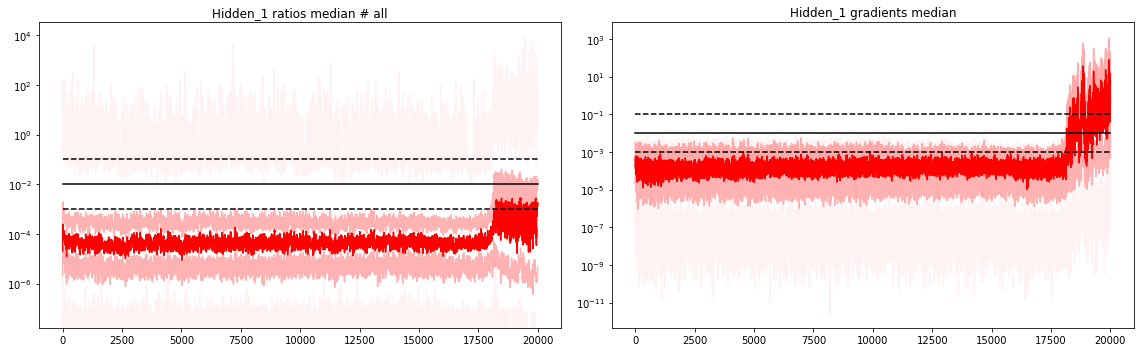

In [15]:
plotann.show_layer_summary(tr_conv_1['W'], tr_conv_1['dW'],
                           title_prefix='Hidden_1', color='red', figsize=[16,5])

---

In [16]:
ni, na, nn = tr_conv_1['z'].shape
es = (ni//20) * na
act_fun = 'relu'
print(ni, na, nn)
print('es', es)

20000 2000 16
es 2000000


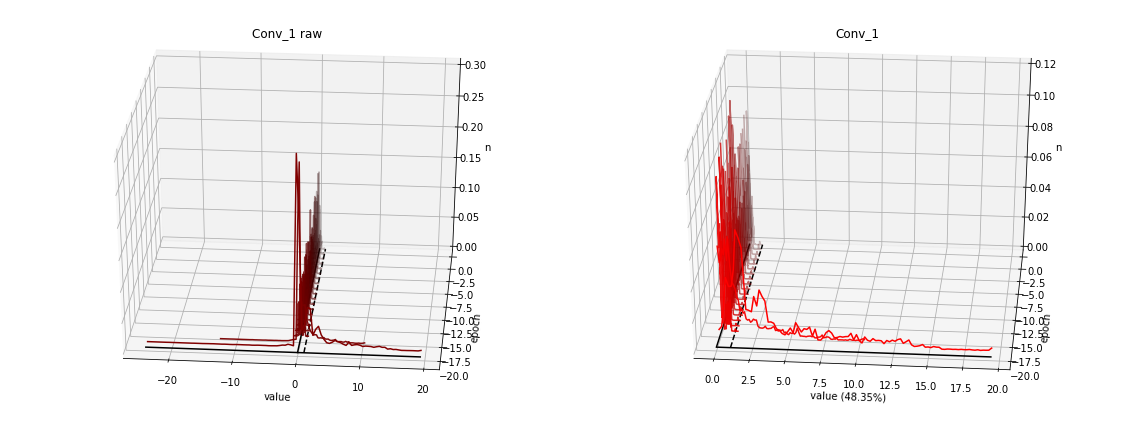

In [17]:
plotann.show_layer_activations(tr_conv_1['z'], epoch_size=es, activation_function=act_fun,
                               title_prefix='Conv_1', color=(1,0,0,1), figsize=[16,6])

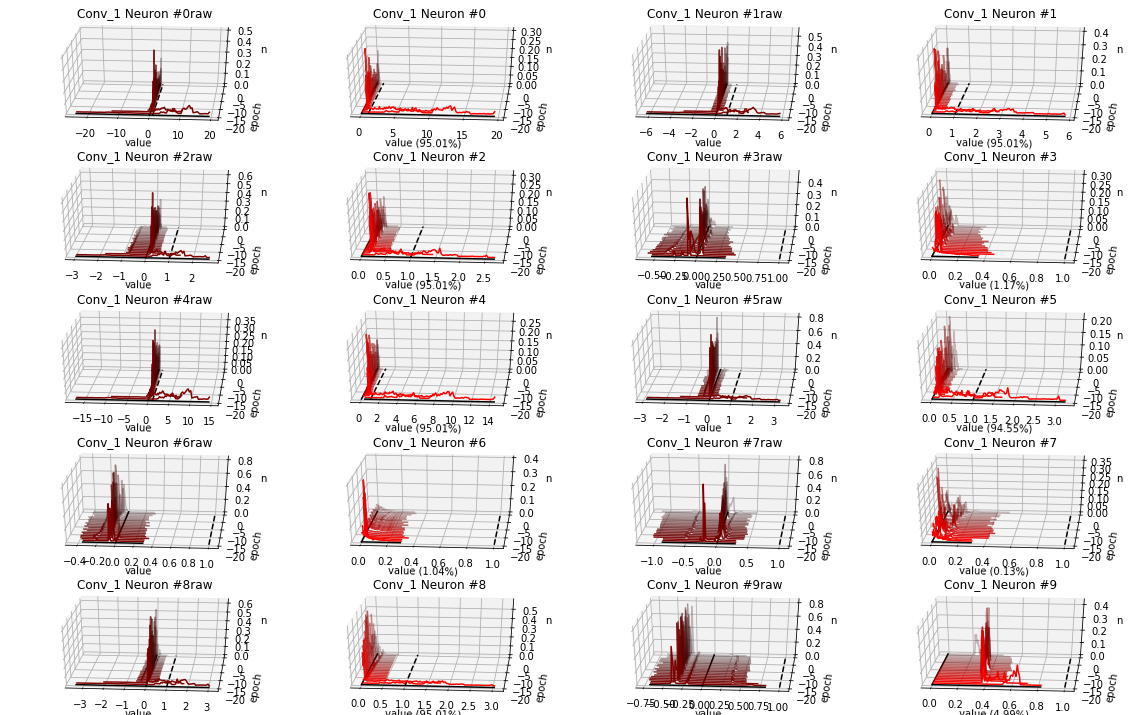

In [18]:
plotann.show_neurons_activations(tr_conv_1['z'], epoch_size=es, activation_function=act_fun, neurons=range(10),
                                 title_prefix='Conv_1', color=(1,0,0,1))

# Conv 2

In [19]:
tr_conv_2['W'].shape

(20000, 256, 32)

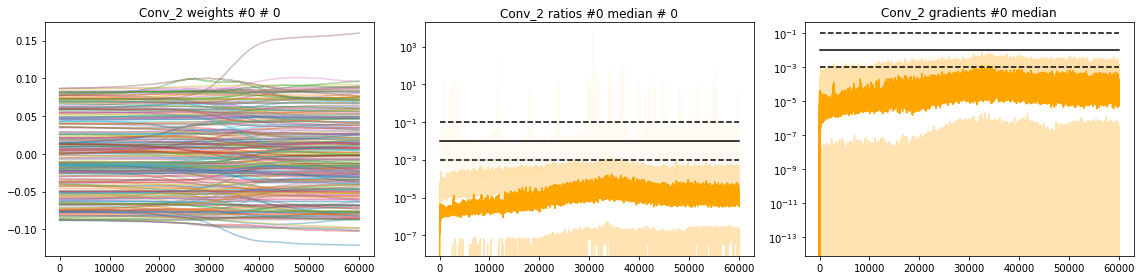

In [11]:
plotann.show_neurons_weights(tr_conv_2['W'], tr_conv_2['dW'], neurons=range(1),
                            title_prefix='Conv_2', color='orange', figsize=[16,4])

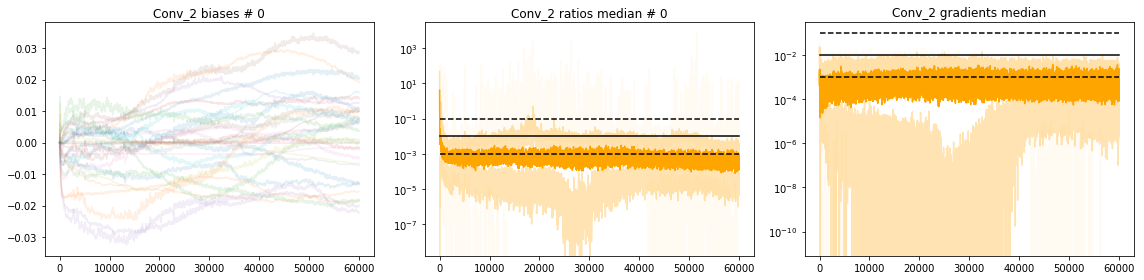

In [12]:
plotann.show_biases(tr_conv_2['b']+1e-6, tr_conv_2['db'], title_prefix='Conv_2', color='orange', figsize=[16,4])

MemoryError: 

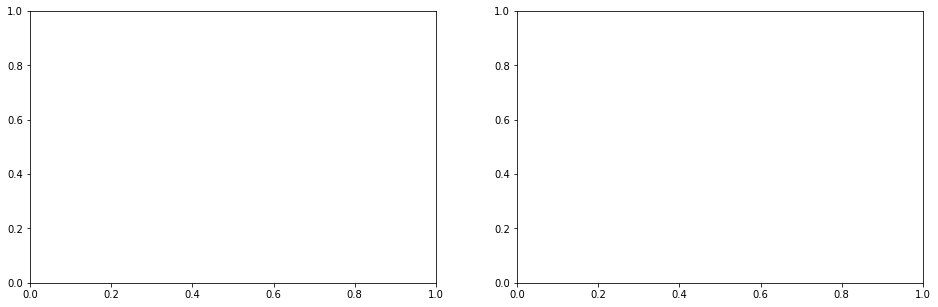

In [13]:
plotann.show_layer_summary(tr_conv_2['W'], tr_conv_2['dW'],
                           title_prefix='Conv_2', color='orange', figsize=[16,5])

---

In [8]:
ni, na, nn = tr_conv_2['z'].shape
es = (ni//20) * na
act_fun = 'relu'
print(ni, na, nn)
print('es', es)

60000 405 32
es 1215000


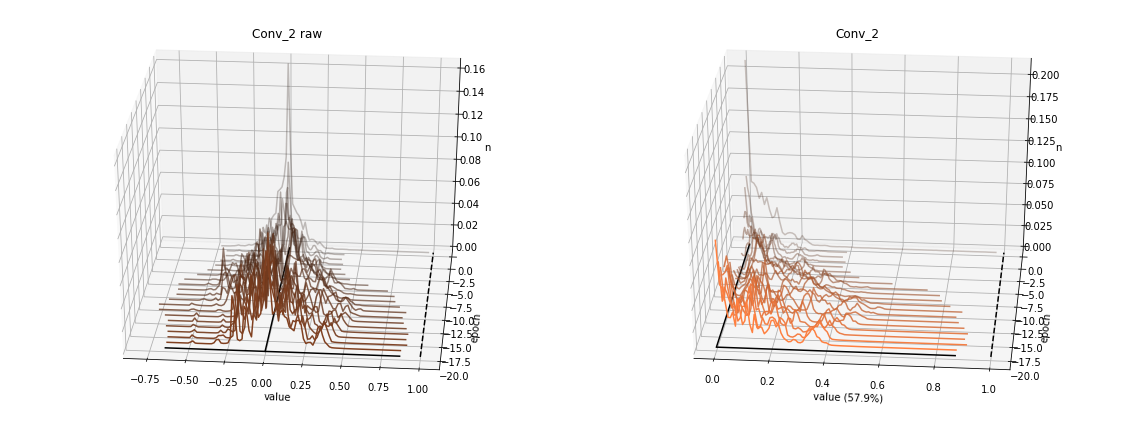

In [9]:
plotann.show_layer_activations(tr_conv_2['z'], epoch_size=es, activation_function=act_fun,
                               title_prefix='Conv_2', color=(1,.5,.25,1), figsize=[16,6])

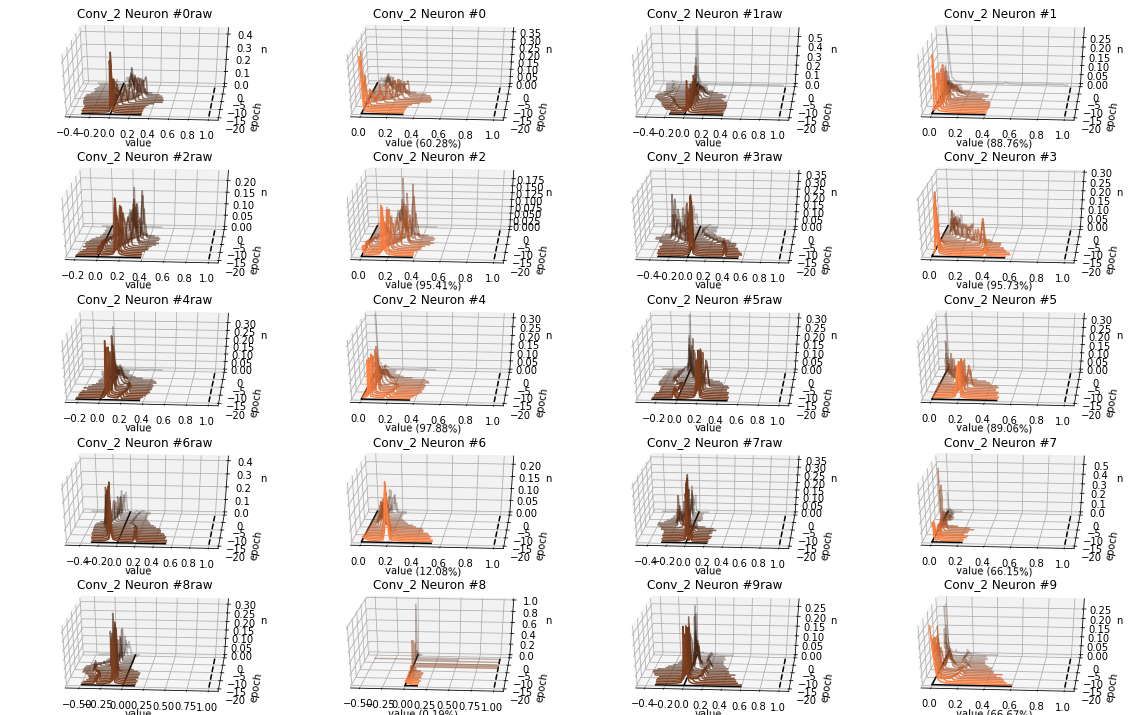

In [10]:
plotann.show_neurons_activations(tr_conv_2['z'], epoch_size=es, activation_function=act_fun, neurons=range(10),
                                 title_prefix='Conv_2', color=(1,.5,.25,1))

# Dense

In [39]:
tr_dense['W'].shape

(60000, 100, 50)

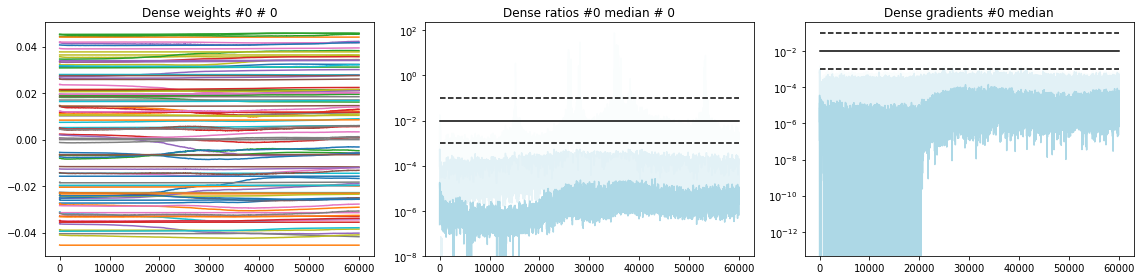

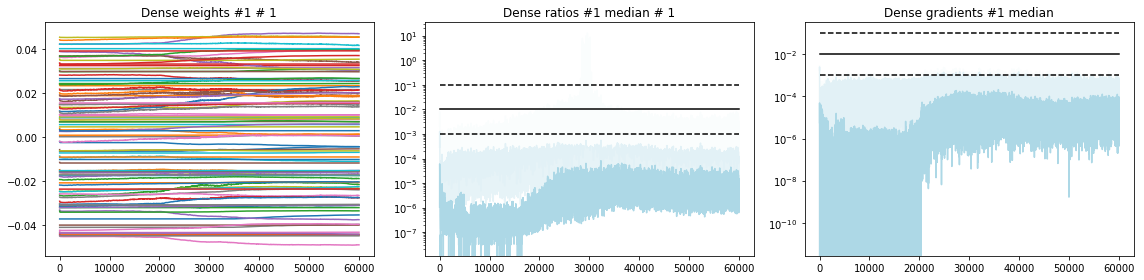

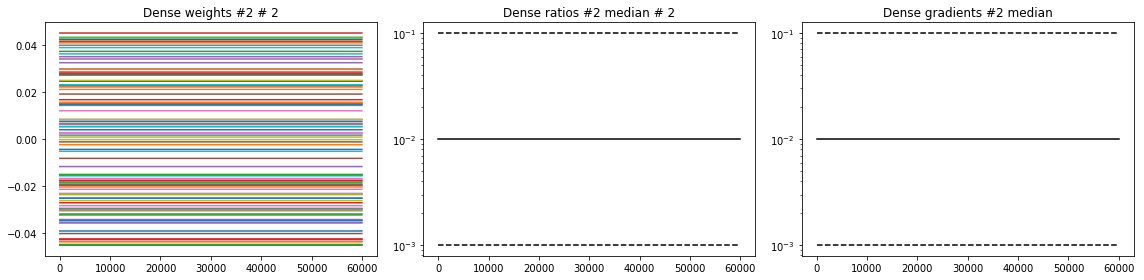

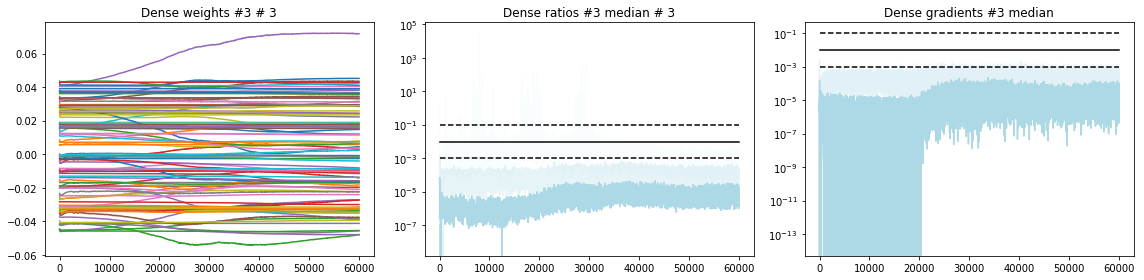

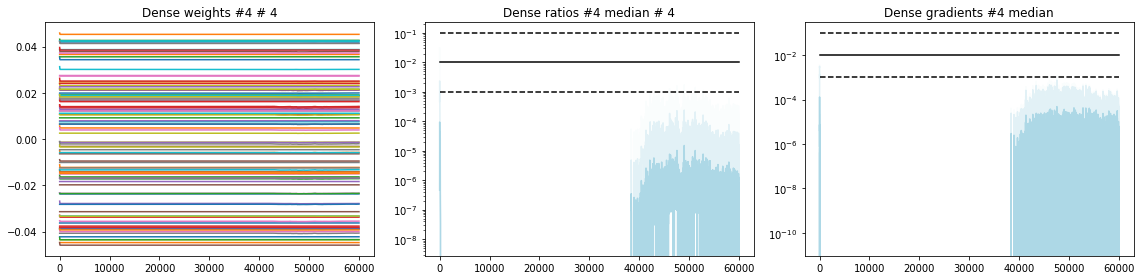

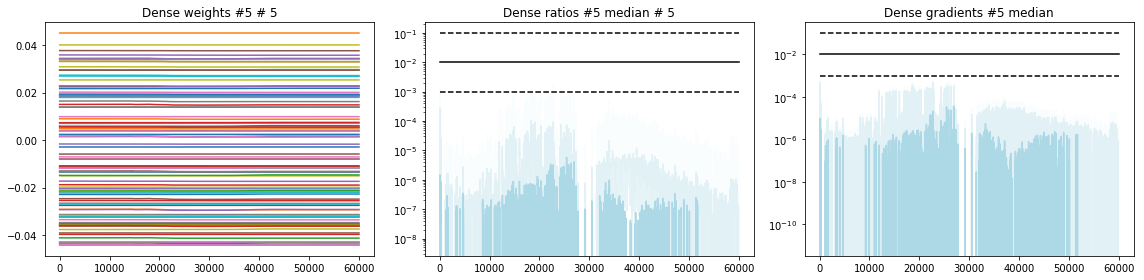

In [42]:
plotann.show_neurons_weights(tr_dense['W'], tr_dense['dW'], neurons=range(6),
                             title_prefix='Dense', color='lightblue', figsize=[16,4])

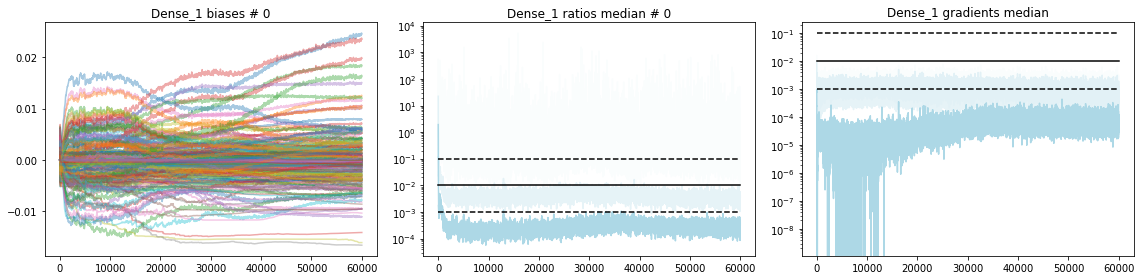

In [41]:
plotann.show_biases(tr_dense['b']+1e-6, tr_dense['db'], title_prefix='Dense_1', color='lightblue', figsize=[16,4])

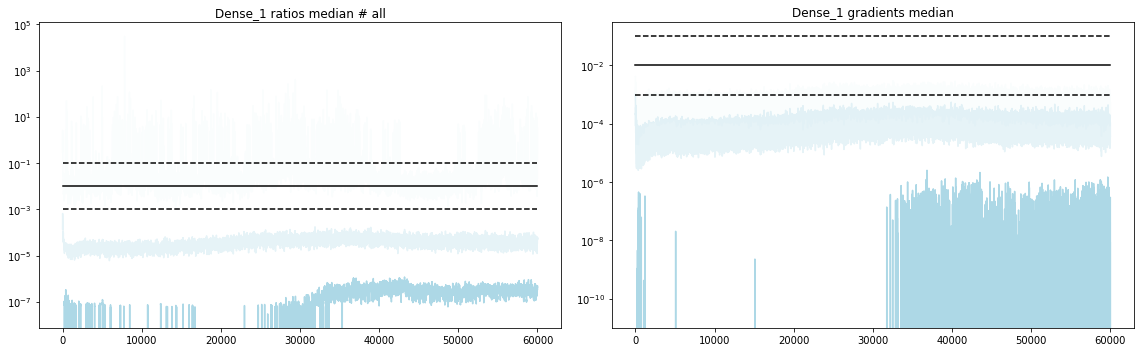

In [40]:
plotann.show_layer_summary(tr_dense['W'], tr_dense['dW'], title_prefix='Dense_1', color='lightblue', figsize=[16,5])

---

In [16]:
ni, na, nn = tr_dense['z'].shape
es = (ni//20) * na
act_fun = 'relu'
print(ni, na, nn)
print('es', es)

10000 5 256
es 2500


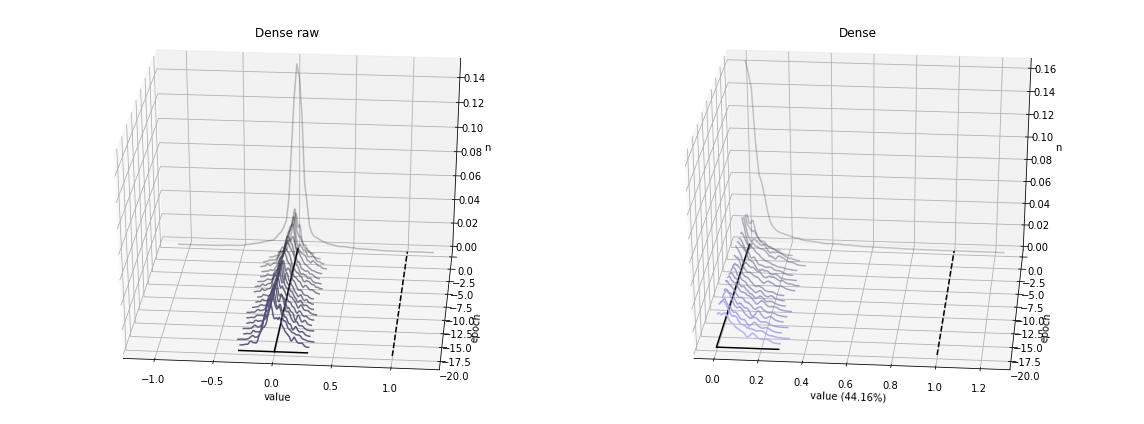

In [17]:
plotann.show_layer_activations(tr_dense['z'], epoch_size=es, activation_function=act_fun,
                               title_prefix='Dense', color=(.7,.7,1,1), figsize=[16,6])

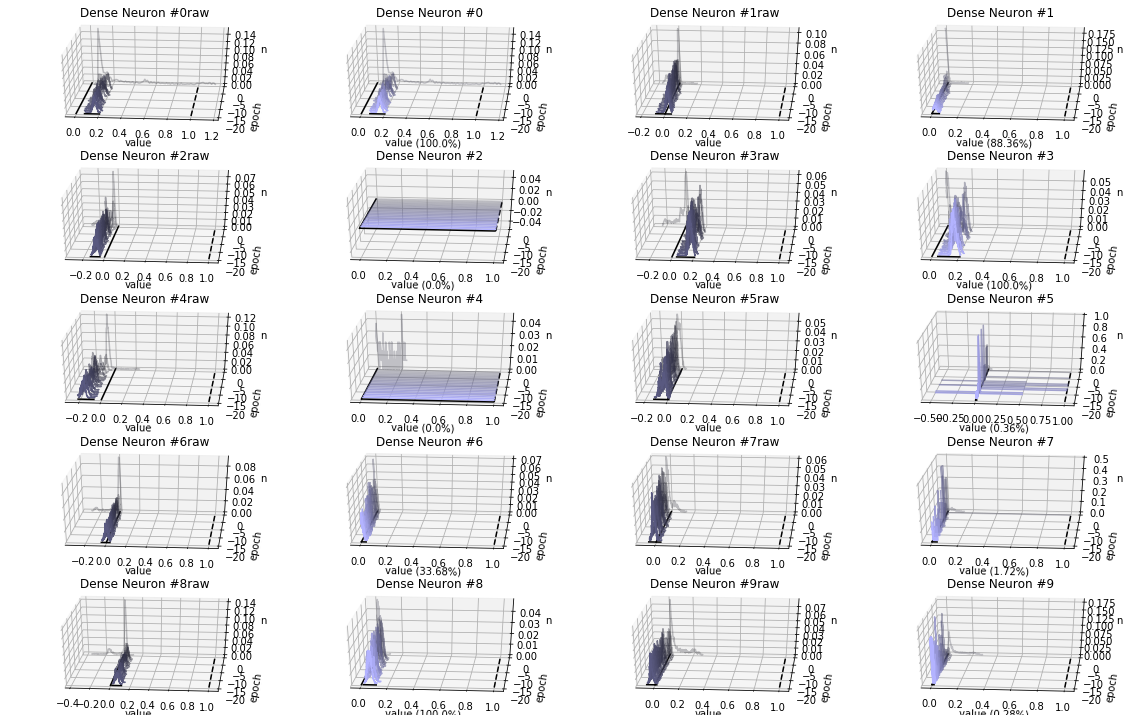

In [18]:
plotann.show_neurons_activations(tr_dense['z'], epoch_size=es, activation_function=act_fun,
                                 neurons=range(10), title_prefix='Dense', color=(.7,.7,1,1))

# Output

In [33]:
tr_output['W'].shape

(10000, 256, 6)

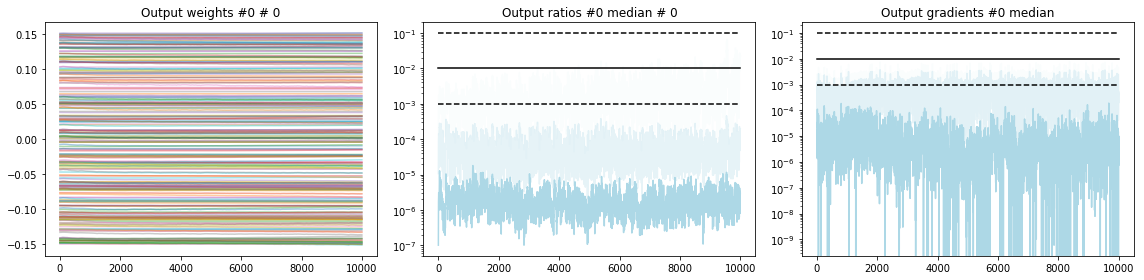

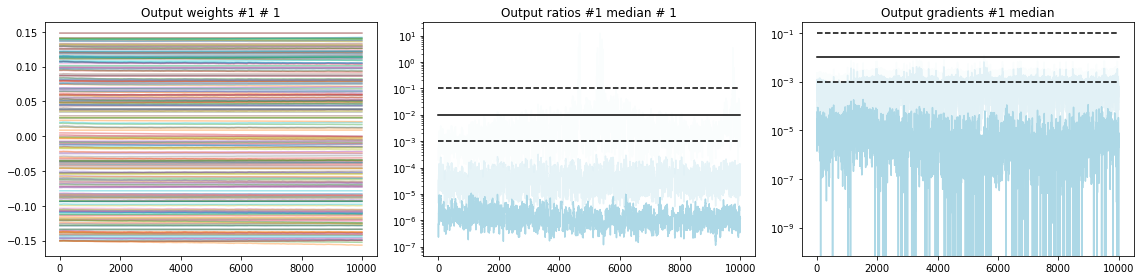

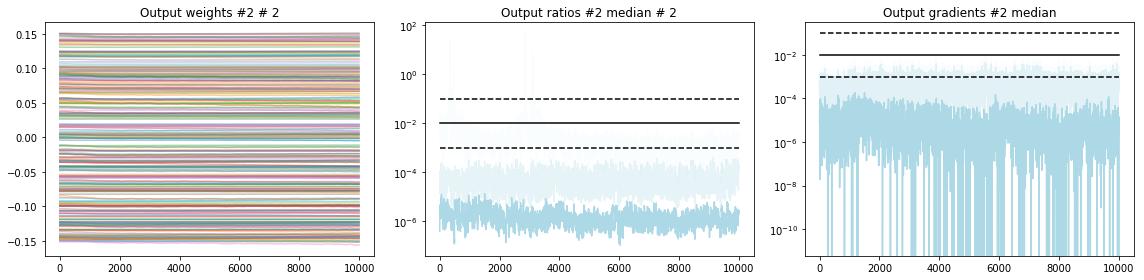

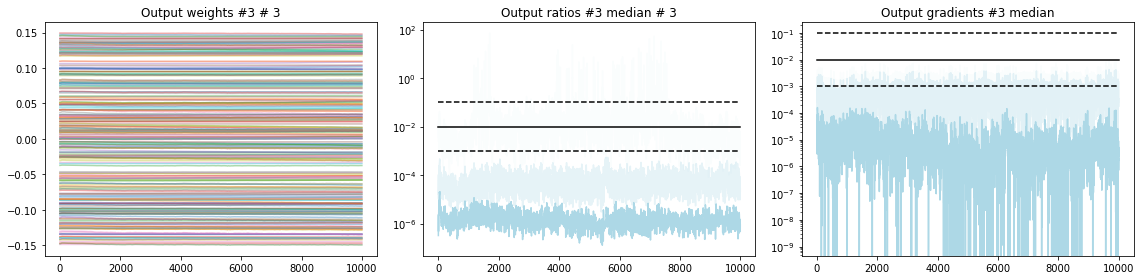

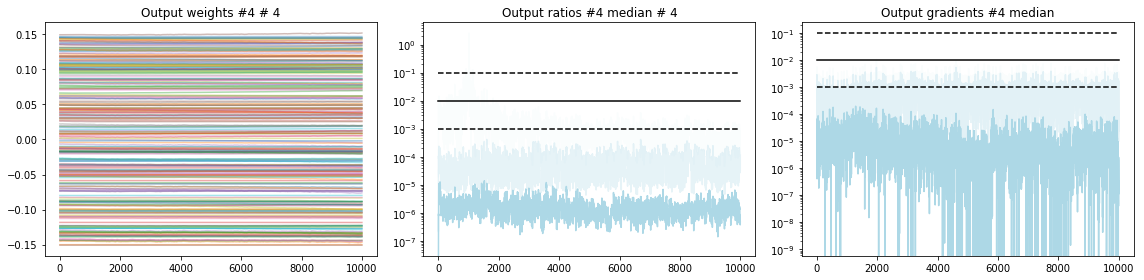

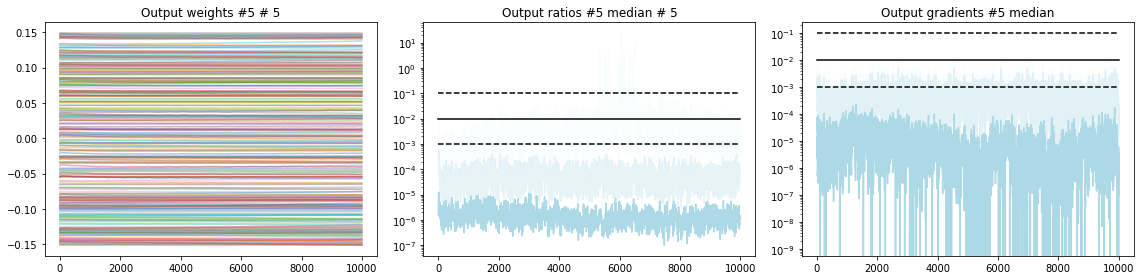

In [34]:
plotann.show_neurons_weights(tr_output['W'], tr_output['dW'], neurons=range(tr_output['W'].shape[-1]),
                            title_prefix='Output', color='lightblue', figsize=[16,4])

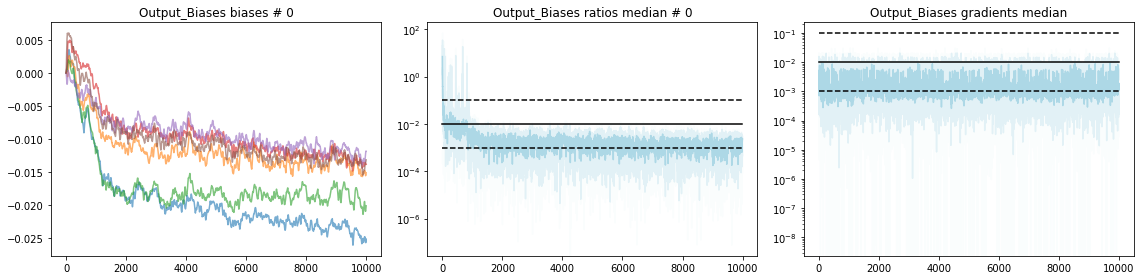

In [35]:
plotann.show_biases(tr_output['b']+1e-6, tr_output['db'], title_prefix='Output_Biases', color='lightblue', figsize=[16,4])

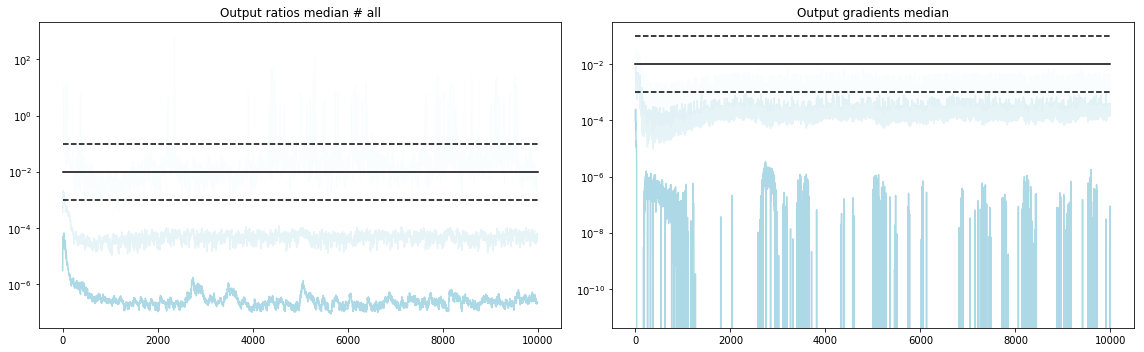

In [15]:
plotann.show_layer_summary(tr_output['W'], tr_output['dW'], title_prefix='Output', color='lightblue', figsize=[16,5])

---

In [37]:
tr_output['z'].shape

(10000, 5, 6)

In [21]:
ni, na, nn = tr_output['z'].shape
es = (ni//20) * na
act_fun = 'relu'
print(ni, na, nn)
print('es', es)

50000 5 6
es 12500


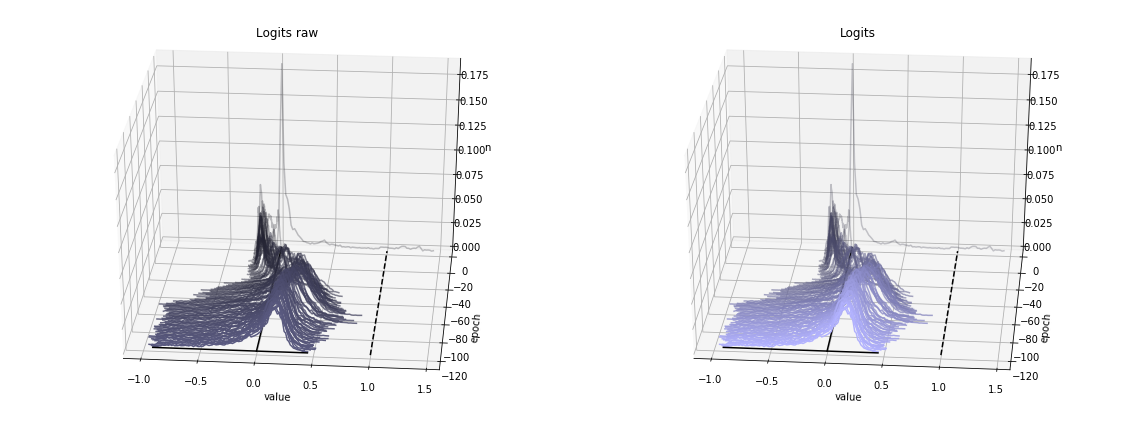

In [34]:
plotann.show_layer_activations(tr_output['z'], epoch_size=es, activation_function=None,
                               title_prefix='Logits', color=(.7,.7,1,1), figsize=[16,6])

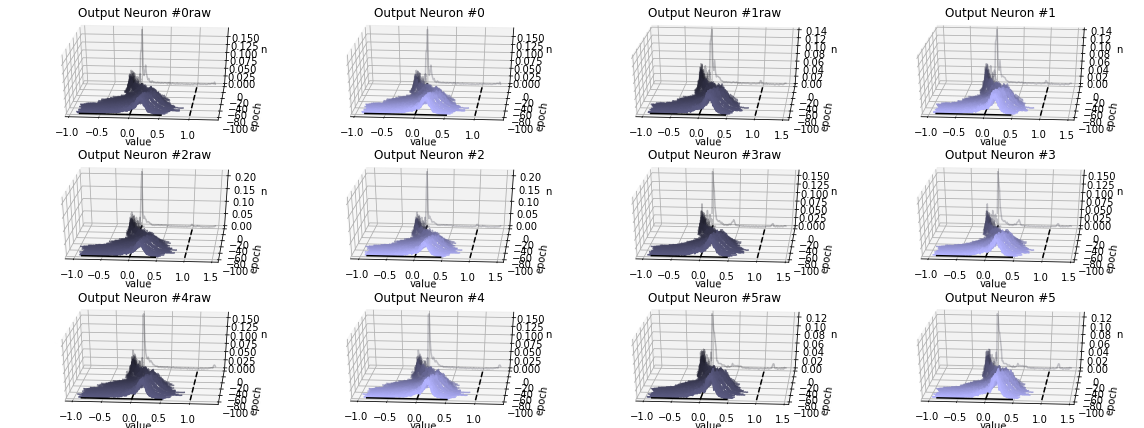

In [28]:
plotann.show_neurons_activations(tr_output['z'], epoch_size=es, activation_function=None,
                                 neurons=range(tr_output['z'].shape[-1]), title_prefix='Output', color=(.7,.7,1,1))

# Targets Tail tmp

In [30]:
ni, na, nn = tr_output['z'][-10000:].shape
es = (ni//20) * na
act_fun = 'relu'
print(ni, na, nn)
print('es', es)

10000 5 6
es 2500


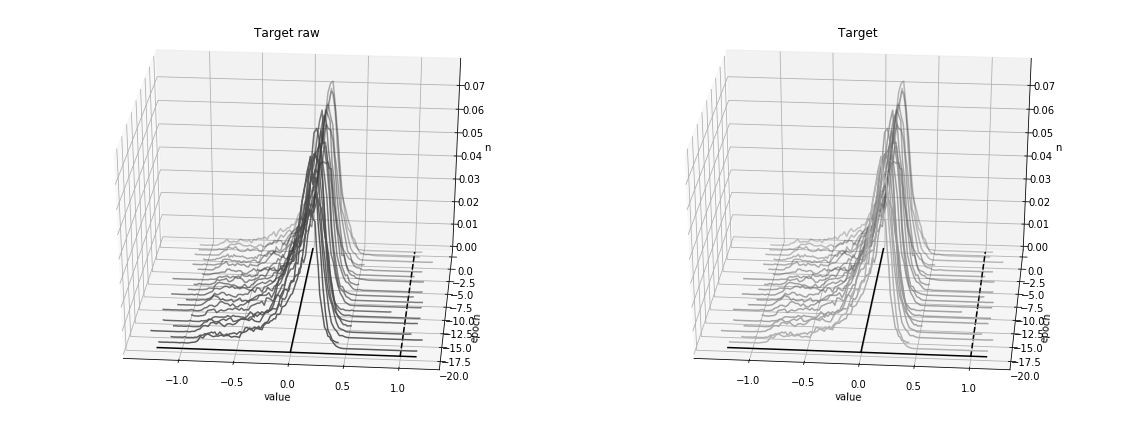

In [31]:
plotann.show_layer_activations(tr_y[-10000:], epoch_size=es, activation_function=None,
                               title_prefix='Target', color=(.7,.7,.7,1), figsize=[16,6])

# Targets

In [41]:
tr_y.shape

(10000, 5, 6)

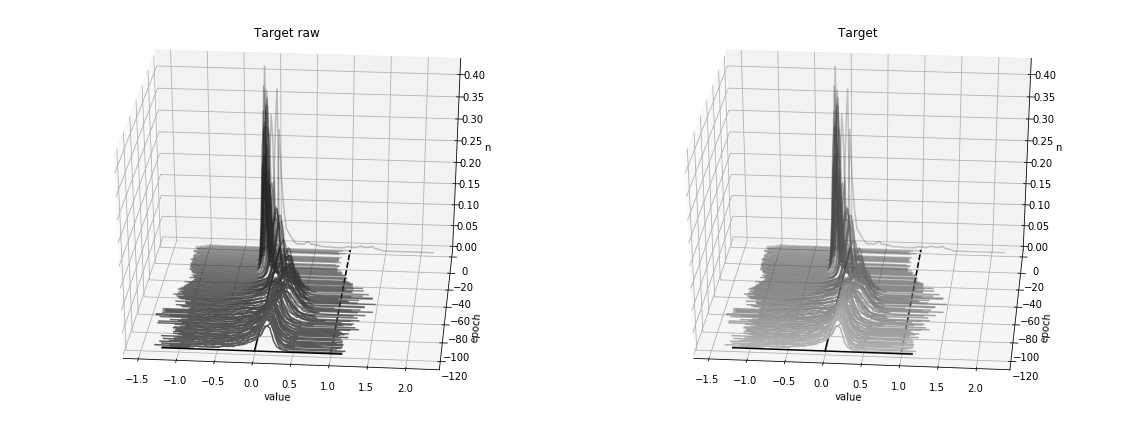

In [33]:
plotann.show_layer_activations(tr_y, epoch_size=es, activation_function=None,
                               title_prefix='Target', color=(.7,.7,.7,1), figsize=[16,6])

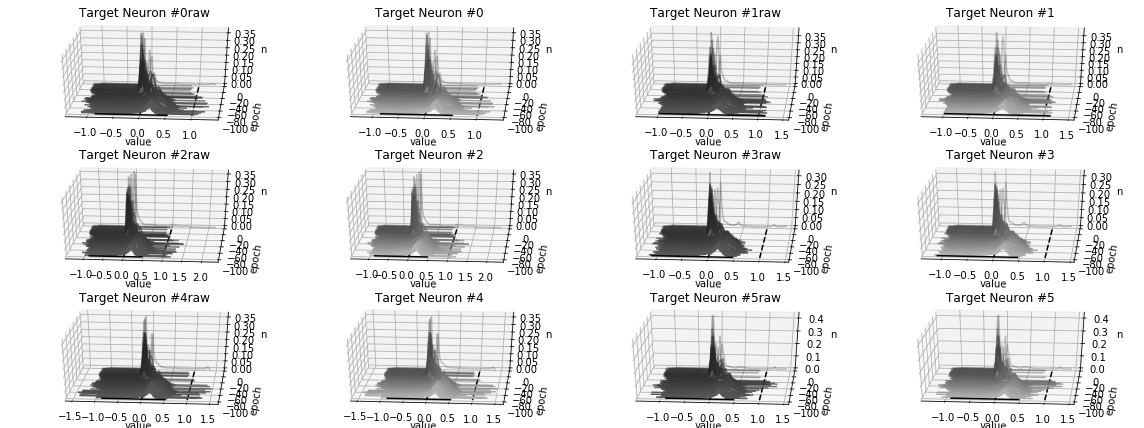

In [26]:
plotann.show_neurons_activations(tr_y, epoch_size=es, activation_function=None, neurons=range(tr_y.shape[-1]),
                                 title_prefix='Target', color=(.7,.7,.7,1))